# Use and Manage Public Data in Research Projects -- Example 1

Tian Lou \
July, 2022

## Table of Contents
<a id = "toc"> </a>

- [BLS API Library](#api_lib)
- [Get Adams County's Monthly Unemployment Rates](#adams_ur)
- [Get 88 Ohio Counties' Monthly Unemployment Rates](#all_cnty_ur)

## BLS API Library
<a id = "api_lib"> </a>

[Go back to Table of Content](#toc)

In this notebook, we will use BLS API to retrieve 2020 - 2022 Ohio county level unemployment rates. Many developers have already created Python libraries that give us eaiser options to use API. The library we will use in this example is called "bls". Check its documentation on Github for more information: https://github.com/OliverSherouse/bls

For information about BLS API, see: https://www.bls.gov/developers/home.htm

In [ ]:
#Import libraries
import pandas as pd
import numpy as np

#BLS API
import bls as bls

Before using BLS API, you need to have two things ready.

1. **Create a public data API account and register for a key on BLS website**: https://data.bls.gov/registrationEngine/
2. **Know the series id(s) of the data you want to retrieve.** 

<div class="alert alert-danger"><strong></strong> Here is an example of the series ids for Ohio Adams County's labor force, employment, unemployment, and unemployment rate. <br></div> 

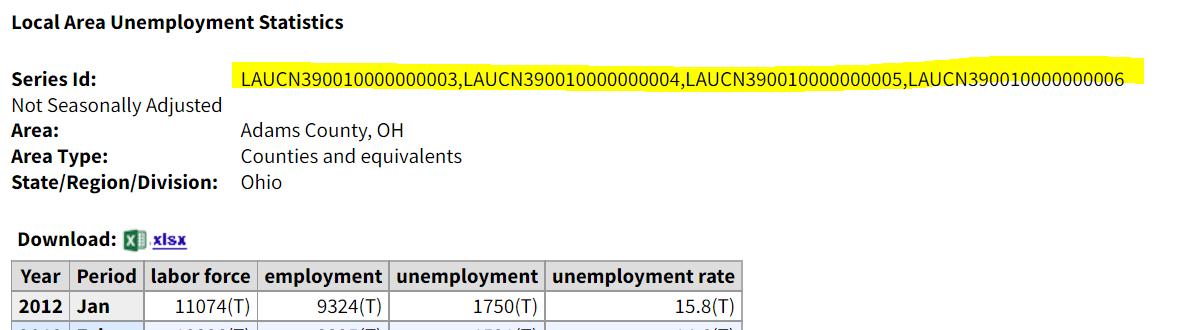

<div class="alert alert-danger"><strong>LAUCN390010000000003</strong> is the series id of the unemployment rate of Adams County in Ohio. <strong>LAUCN</strong> represents the data series. <strong>39</strong> is the state FIPS code and <strong>001</strong> is the county FIPS code. <br></div> 

## Get Adams County's Monthly Unemployment Rates
<a id = "adams_ur"> </a>

[Go back to Table of Content](#toc)

In [ ]:
#Get Adams County's monthly unemployment rates from 2020 to 2022
adams_ur_df = pd.DataFrame(bls.get_series('LAUCN390010000000003',2020,2022, key = 'YOUR_BLS_KEY')).reset_index()

#Check the first five rows of the data
adams_ur_df.head()

In the above code, `pd.DataFrame` and `reset_index()` transform the data to the format that is easy for us to work with in Python. `bls.get_series` is the function we get from the bls API library. Inside of the function, we need to have 1) the data series id,  "**LAUCN390010000000003**"; 2) the starting year, "**2020**", 3) the end year, "**2022**", and your BLS API key.

## Get 88 Ohio Counties' Monthly Unemployment Rates
<a id = "all_cnty_ur"> </a>

[Go back to Table of Content](#toc)

You do not need to repeat the above code 88 times. You can use a loop to easily get all 88 counties' data. Note that the series ids for the 88 counties are mostly the same, except for the three-digit county FIPS code (LAUCN39<font color='red'>**001**</font>0000000003).

Here is the complete list of Ohio county FIPS code: https://en.wikipedia.org/wiki/List_of_counties_in_Ohio

You can see that they are the odd numbers between 1 and 175. We can use Python to generate these numbers and add leading zeros to numbers that are less than 100.

In [ ]:
#Generate the list of Ohio county fips code
county_fips = [str(x).zfill(3) for x in np.arange(1, 176,2).tolist()]

#See the first five numbers in the list
county_fips[:5]

In [ ]:
#Generate an empty DataFrame
oh_cnty_ur_df = pd.DataFrame()

#Get unemployment and labor force from BLS website
for c in county_fips:
    
    #Get Unemployment Rate
    ur_temp_df = pd.DataFrame(bls.get_series('LAUCN39' + c + '0000000003',2020,2021, key = 'YOUR_BLS_KEY')).reset_index()
    
    #Rename the series ID to "unemployment rate"
    ur_temp_df = ur_temp_df.rename(columns = {'LAUCN39' + c + '0000000003' : 'unemployment rate'})
    
    #Add a new column to store county fips code
    ur_temp_df['cnty_fips'] = c
    
    #Append DataFrames
    oh_cnty_ur_df = oh_cnty_ur_df.append(ur_temp_df)

#See the first five rows of the DataFrame
oh_cnty_ur_df.head()

In the above code, we loop through all 88 county FIPS codes to get each county's monthly unemployment rates. We use the same `bls.get_series` function, except that we change the series id part to `'LAUCN39' + c + '0000000003'`. This allows Python to replace the county FIPS code part with a new value during each time.

The rest of the code is to transform the DataFrame to a format that is eaiser for us to work with. For example, in the previous section, you can see that the column name of unemployment rate is "LAUCN390010000000003". We can change it to "unemployment rate" during the loop. We should also add a new column to store county FIPS codes.

Now you have all 88 Ohio counties' monthly unemployment rates from 2020 to 2022. Think about how you can use similar codes to get additional years of data, data from other states, or a different series of data. You can also adopt the same method in another program, such as R.